In [5]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from itertools import chain
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [6]:
reviews = pd.read_json('Cell_Phones.json',lines=True)

In [11]:
reviews[['HelpfulnessNumerator','HelpfulnessDenominator']] = pd.DataFrame(reviews.helpful.values.tolist(), index = reviews.index)

In [12]:
reviews.drop_duplicates(subset=['reviewerID', 'asin','unixReviewTime'],inplace=True)

#Adding the helpfulness and upvote percentages for metrics
reviews['Helpful %'] = np.where(reviews['HelpfulnessDenominator'] > 0, reviews['HelpfulnessNumerator'] / reviews['HelpfulnessDenominator'], -1)
reviews['% Upvote'] = pd.cut(reviews['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
reviews['Id'] = reviews.index;
reviews

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator,Helpful %,% Upvote,Id
0,120401325X,"[0, 0]",4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400,0,0,-1.000000,Empty,0
1,120401325X,"[0, 0]",5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600,0,0,-1.000000,Empty,1
2,120401325X,"[0, 0]",5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800,0,0,-1.000000,Empty,2
3,120401325X,"[4, 4]",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,4,4,1.000000,80-100%,3
4,120401325X,"[2, 3]",5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600,2,3,0.666667,60-80%,4
5,120401325X,"[1, 2]",3,These make using the home button easy. My daug...,"10 12, 2013",APX47D16JOP7H,RLH,Cute,1381536000,1,2,0.500000,40-60%,5
6,120401325X,"[0, 0]",5,Came just as described.. It doesn't come unstu...,"08 22, 2013",A1JVVYYO7G56DS,Tyler Evans,best thing ever..,1377129600,0,0,-1.000000,Empty,6
7,3998899561,"[1, 2]",1,it worked for the first week then it only char...,"11 21, 2013",A6FGO4TBZ3QFZ,Abdullah Albyati,not a good Idea,1384992000,1,2,0.500000,40-60%,7
8,3998899561,"[2, 3]",5,"Good case, solid build. Protects phone all aro...","09 25, 2013",A2JWEDW5FSVB0F,Adam,Solid Case,1380067200,2,3,0.666667,60-80%,8
9,3998899561,"[1, 1]",5,This is a fantastic case. Very stylish and pro...,"04 3, 2014",A8AJS1DW7L3JJ,Agata Majchrzak,Perfect Case,1396483200,1,1,1.000000,80-100%,9


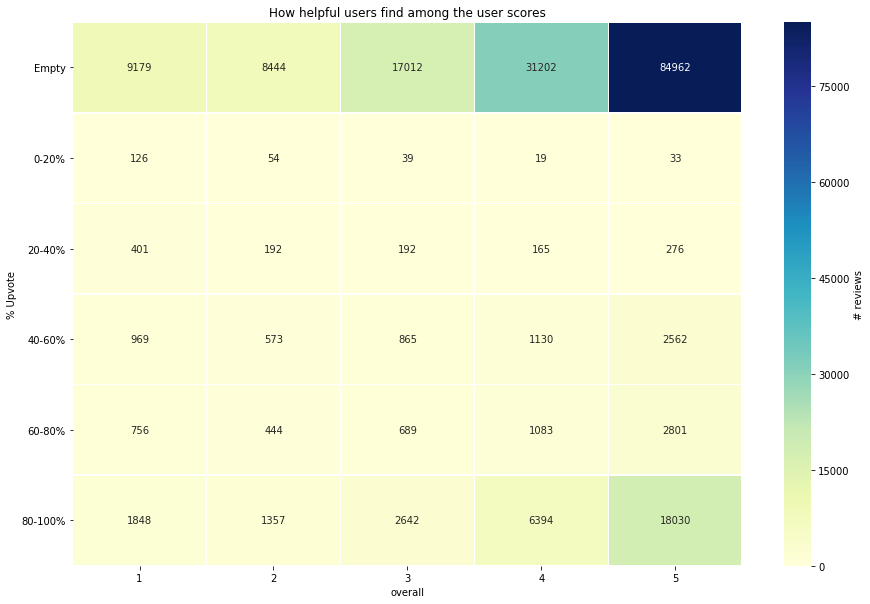

In [13]:
df_s = reviews.groupby(['overall', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among the user scores')
plt.show()

In [14]:
df =  reviews[reviews['overall'] != 3]
X = df['reviewText']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df['overall'].map(y_dict)

In [15]:
c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())

# features: 80572
# train records: 129750
# test records: 43250


c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model Accuracy: 0.9227514450867053

-Top 20 positive-
Coefficient         Word
   2.364225        loves
   2.240461  compliments
   1.976636        charm
   1.974219        saved
   1.735353         beat
   1.727438       highly
   1.724624    complaint
   1.693213   pleasantly
   1.649264    excellent
   1.616708         love
   1.496222        steal
   1.465740        worry
   1.462217   minimalist
   1.448485       affect
   1.442995        likes
   1.433219     hesitate
   1.418756        grabs
   1.418606        blown
   1.418017    perfectly
   1.413035    skeptical

-Top 20 negative-
Coefficient            Word
  -1.777262  disappointment
  -1.787046         stopped
  -1.791506           false
  -1.810153          faulty
  -1.810298           trash
  -1.837653    unacceptable
  -1.864629            poor
  -1.874642            quit
  -1.905951        unusable
  -1.914278         defeats
  -1.918879          poorly
  -1.970114       worthless
  -1.979475        horrible
  -2.02835

In [16]:
text_fit(X, y, c, DummyClassifier(),0)

# features: 80572
# train records: 129750
# test records: 43250
Model Accuracy: 0.7594219653179191


In [17]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 80572
# train records: 129750
# test records: 43250
Model Accuracy: 0.9259653179190751

-Top 20 positive-
Coefficient         Word
  10.458970        great
   9.996280         love
   7.938086      perfect
   7.540570    perfectly
   7.327434    excellent
   6.708348       highly
   6.478913        loves
   6.402491        works
   6.156980         easy
   5.937480         best
   5.747465      awesome
   5.347327          job
   5.017217    complaint
   4.805634         nice
   4.760996  compliments
   4.699123     protects
   4.657057      exactly
   4.653873      amazing
   4.608653      pleased
   4.577452         good

-Top 20 negative-
Coefficient           Word
  -4.238082  unfortunately
  -4.283391        concept
  -4.765976        garbage
  -4.884568           junk
  -4.943531     impossible
  -5.034051          broke
  -5.343388  disappointing
  -5.413436         poorly
  -5.506030         refund
  -5.666842        stopped
  -5.926077       terrible
  -5.983629   

In [20]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 2256450
# train records: 129750
# test records: 43250
Model Accuracy: 0.9206473988439307

-Top 20 positive-
Coefficient       Word
  15.113384      great
  14.158896       love
  10.276112    perfect
   9.538884      works
   8.937969       easy
   8.881491  perfectly
   7.929255  excellent
   7.704342       best
   7.497264       nice
   7.412977      loves
   6.849201       fits
   6.810547    awesome
   6.559323      price
   6.171743     little
   5.811522     highly
   5.805764       good
   5.518528        job
   5.458656    exactly
   5.378804        far
   5.287869        bit

-Top 20 negative-
Coefficient          Word
  -5.490899         tried
  -5.520951    impossible
  -5.659842        poorly
  -5.978339       started
  -6.021297          junk
  -6.065484         cheap
  -6.373978       stopped
  -6.384082      does fit
  -6.588351        refund
  -6.740348      terrible
  -7.371243      horrible
  -7.448810         worst
  -7.586276     returning
  -7.833631   

In [21]:
df = df[df['overall'] == 5]
df = df[df['% Upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
df.shape

X = df['reviewText']
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = df['% Upvote'].map(y_dict)

print('Class distribution:')
print(y.value_counts())

Class distribution:
1    20831
0      309
Name: % Upvote, dtype: int64


In [22]:
df_s = pd.DataFrame(data = [X,y]).T

Downvote_records = len(df_s[df_s['% Upvote'] == 0])
Downvote_indices = np.array(df_s[df_s['% Upvote'] == 0].index)

Upvote_indices = df_s[df_s['% Upvote'] == 1].index

random_upvote_indices = np.random.choice(Upvote_indices, Downvote_records, replace = False)
random_upvote_indices = np.array(random_upvote_indices)

under_sample_indices = np.concatenate([Downvote_indices,random_upvote_indices])

under_sample_data = df_s.loc[under_sample_indices, :]
X_u = under_sample_data['reviewText']
under_sample_data['% Upvote'] = under_sample_data['% Upvote'].astype(int)
y_u = under_sample_data['% Upvote']


print("Percentage of upvote transactions: ", len(under_sample_data[under_sample_data['% Upvote'] == 1])/len(under_sample_data))
print("Percentage of downvote transactions: ", len(under_sample_data[under_sample_data['% Upvote'] == 0])/len(under_sample_data))
print("Total number of records in resampled data: ", len(under_sample_data))

Percentage of upvote transactions:  0.5
Percentage of downvote transactions:  0.5
Total number of records in resampled data:  618


In [23]:
c = CountVectorizer(stop_words = 'english')

text_fit(X_u, y_u, c, LogisticRegression())

# features: 6622
# train records: 463
# test records: 155
Model Accuracy: 0.6645161290322581

-Top 20 positive-
Coefficient        Word
   0.968168       touch
   0.844243   purchased
   0.758524       cover
   0.694911      months
   0.688813  connection
   0.662681    problems
   0.651182      finish
   0.645925         pen
   0.635918   batteries
   0.619016      button
   0.609210       apply
   0.595117       speed
   0.587322       looks
   0.578749       clear
   0.575336    chargers
   0.566321        nice
   0.565698      stylus
   0.560440      thanks
   0.547384         old
   0.536881         far

-Top 20 negative-
Coefficient         Word
  -0.460448      running
  -0.464637       strong
  -0.474268       really
  -0.480694   protectors
  -0.488084        comes
  -0.490004        light
  -0.494111       device
  -0.505341         deal
  -0.509346       bought
  -0.512292        handy
  -0.539406       review
  -0.548865     hyperion
  -0.551606  recommended
  -0.565699    

In [24]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')

text_fit(X_u, y_u, tfidf_n, LogisticRegression())

# features: 43487
# train records: 463
# test records: 155
Model Accuracy: 0.632258064516129

-Top 20 positive-
Coefficient              Word
   1.002579              case
   0.883592            screen
   0.649742             cover
   0.547725         protector
   0.538366             touch
   0.535625               pen
   0.477031              does
   0.458227             looks
   0.453087         purchased
   0.389355          protects
   0.385960            finish
   0.377955        protection
   0.372180  screen protector
   0.358602           handset
   0.344241             apply
   0.335037           ordered
   0.331188    protects phone
   0.329680              home
   0.325232            stylus
   0.324100            months

-Top 20 negative-
Coefficient        Word
  -0.307190       voice
  -0.308782     speaker
  -0.312442        unit
  -0.314987    bracelet
  -0.316518      review
  -0.318784  headphones
  -0.350786        hope
  -0.364688       thank
  -0.365619       jabra

In [25]:
#pd.set_option('display.max_colwidth', -1)
print('Downvote score 5 comments examples:')
print(under_sample_data[under_sample_data['% Upvote']==0]['reviewText'].iloc[:100:20])
print('Upvote score 5 comments examples')
print(under_sample_data[under_sample_data['% Upvote']==1]['reviewText'].iloc[:100:20])

Downvote score 5 comments examples:
167      couldnt watch movies on the htc without the ba...
10395    bought my daughter a palm pre and had the chan...
32107    Bought two of these back when. The cards worke...
43070    I needed another usb cable for my iPhone 4s an...
55502    I am really impressed with this products and I...
Name: reviewText, dtype: object
Upvote score 5 comments examples
12734     Let me preface by saying that I've been on Ver...
61971     Actually better than the siii version slower b...
34280     By far the easiest screen protector i have eve...
159510    I received one of these from Tech Armor for th...
66710     Great phone! yes very nice good no problems. T...
Name: reviewText, dtype: object


In [28]:
df_user = reviews.groupby(['reviewerID']).agg({'overall':['count', 'mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Rating count', 'Rating mean']
df_user = df_user.sort_values(by = 'Rating count', ascending = False)
print(df_user.head(10))

                Rating count  Rating mean
reviewerID                               
A2NYK9KWFMJV4Y           152     4.907895
A1EVV74UQYVKRY           138     4.731884
A22CW0ZHY3NJH8           138     4.471014
A1ODOGXEYECQQ8           134     4.313433
A2NOW4U7W3F7RI           132     4.765152
A36K2N527TXXJN           124     4.524194
A1UQBFCERIP7VJ           114     4.850877
A18U49406IPPIJ           109     4.944954
A1E1LEVQ9VQNK            109     4.935780
AYB4ELCS5AM8P            107     4.887850


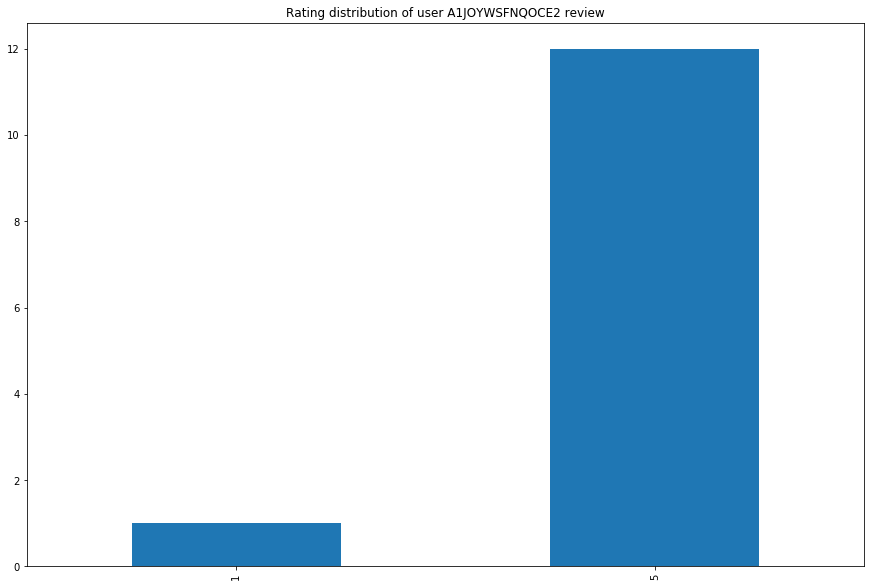

In [30]:
def plot_user(reviewerID):
    df_1user = reviews[reviews['reviewerID'] == reviewerID]['overall']
    df_1user_plot = df_1user.value_counts(sort=False)
    ax = df_1user_plot.plot(kind = 'bar', figsize = (15,10), title = 'Rating distribution of user {} review'.format(reviews[reviews['reviewerID'] == reviewerID]['reviewerID'].iloc[0]))
    plt.show()

plot_user('A1JOYWSFNQOCE2')

In [31]:
print(df_user[(df_user['Rating mean']<3.5) & (df_user['Rating mean']>2.5)].head())

                Rating count  Rating mean
reviewerID                               
A3LDPF5FMB782Z            39     3.435897
A2QRXQPHDMFCQV            28     3.214286
A1KRF81GTI2KKT            27     2.814815
A1F9Z42CFF9IAY            27     3.074074
A3PDNN5MJF9ZJ0            27     3.481481


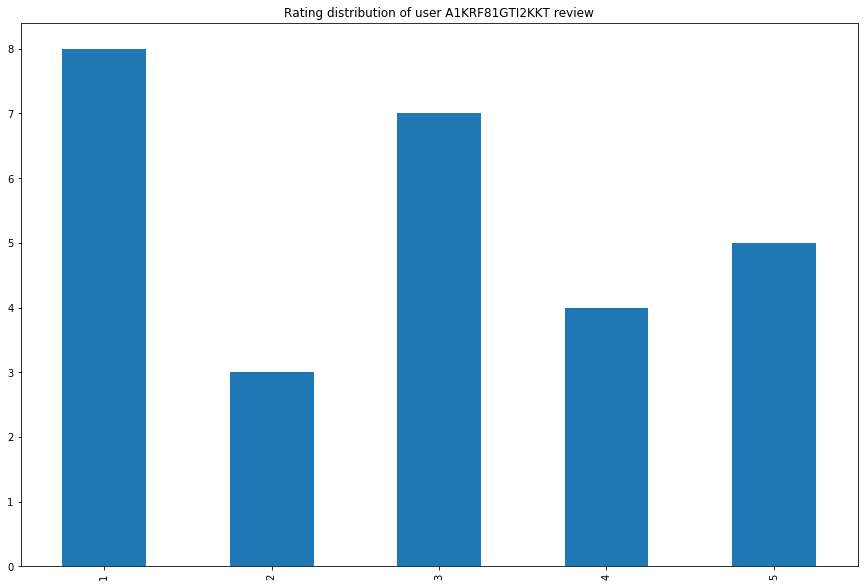

In [32]:
plot_user('A1KRF81GTI2KKT')

In [39]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def get_token_ngram(score, benchmark, userid='all'):

    if userid != 'all':
        df = reviews[(reviews['reviewerID'] == userid) & (reviews['overall'] == score)]['reviewText']
    else:
        df = reviews[reviews['overall'] == score]['reviewText']
        
    count = len(df)
    total_text = ' '.join(df)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'v') for w in total_text]
    bigrams = ngrams(total_text,2)
    trigrams = ngrams(total_text, 3)

    # look at 2-gram and 3-gram together
    combine = chain(bigrams, trigrams)
    text = nltk.Text(combine)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])

# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_ngram(j, 0.25, 'A2P739KOM4U5JB')
    print('score {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    #test = test.sort_values('Count', ascending=False)
    print(test)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


score 1 reviews most popular 2-gram / 3-gram:
Empty DataFrame
Columns: []
Index: []
score 2 reviews most popular 2-gram / 3-gram:
Empty DataFrame
Columns: []
Index: []
score 3 reviews most popular 2-gram / 3-gram:
Empty DataFrame
Columns: []
Index: []
score 4 reviews most popular 2-gram / 3-gram:
Empty DataFrame
Columns: []
Index: []
score 5 reviews most popular 2-gram / 3-gram:
Empty DataFrame
Columns: []
Index: []


In [43]:
# score 1-5 reviews with all users
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    # easier benchmark since we have many different users here, thus different phrase
    d = get_token_ngram(j, 0.03)
    print('score {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    test = test.sort_values('Count', ascending=False)
    print(test)

score 1 reviews most popular 2-gram / 3-gram:
    Count Occur %                Phrase
0   926.0   6.97%   (screen, protector)
1   829.0   6.24%        (waste, money)
2   769.0   5.79%           (n't, work)
3   614.0   4.62%           (n't, even)
4   566.0   4.26%          (would, n't)
5   517.0   3.89%       (charge, phone)
6   436.0   3.28%  (screen, protectors)
7   434.0   3.27%            (get, pay)
8   430.0   3.24%          (look, like)
9   410.0   3.09%          (stop, work)
10  402.0   3.03%            (n't, fit)
score 2 reviews most popular 2-gram / 3-gram:
     Count Occur %                Phrase
0   1048.0   9.47%   (screen, protector)
1    508.0   4.59%          (would, n't)
2    436.0   3.94%           (n't, work)
3    425.0   3.84%         (phone, case)
4    395.0   3.57%          (look, like)
5    370.0   3.34%      (sound, quality)
6    365.0    3.3%          (work, well)
7    354.0    3.2%       (charge, phone)
8    353.0   3.19%       (battery, life)
9    351.0   3.17%